# Gradiant Boosting walkthrough


SK-Learn Documentation: https://scikit-learn.org/dev/modules/tree.html


In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

import pandas_profiling

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

/home/jbslanka/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

#  Regression Tree

Housing values in the Boston suburbs.  This data set contains 506 rows and 14 columns/variables:

Variable | Description
----------- | ---------
crim | per capita crime rate by town.
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town.
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox| nitrogen oxides concentration (parts per 10 million).
rm | average number of rooms per dwelling.
age | proportion of owner-occupied units built prior to 1940.
dis | weighted mean of distances to five Boston employment centres.
rad | index of accessibility to radial highways.
tax | full-value property-tax rate per \$10,000.
ptratio | pupil-teacher ratio by town.
black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
lstat | lower status of the population (percent).
medv | median value of owner-occupied homes in \$1000s.

Data Source: https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html

Predict housing values

In [3]:
boston_df = pd.read_csv('data/Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
#boston_df.profile_report(style={'full_width':True})

In [5]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [6]:
dtr1 = DecisionTreeRegressor(random_state=42)
dtr1.fit(X_train, y_train)
pred = dtr1.predict(X_test)

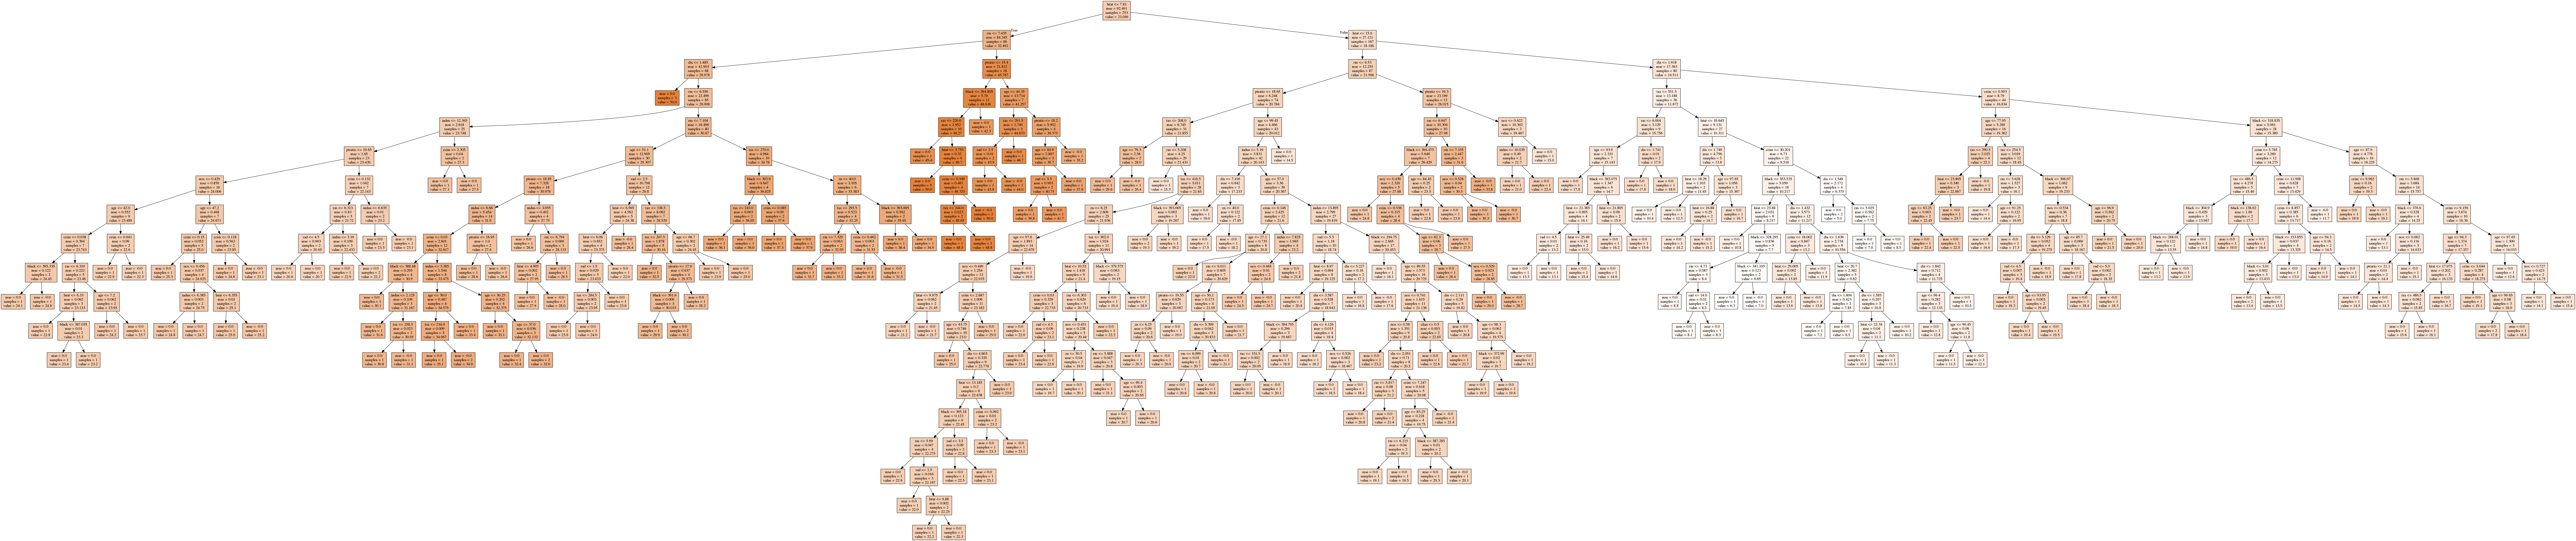

In [7]:
graph, = print_tree(dtr1, features=X.columns)
Image(graph.create_png())

Text(0, 0.5, 'y_test')

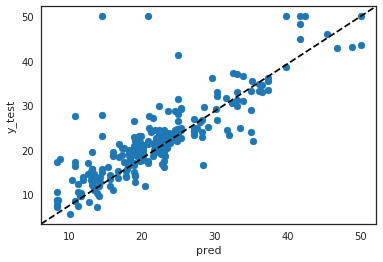

In [8]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [9]:
mean_squared_error(y_test, pred)

23.38909090909091

In [10]:
list(X_train.columns)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

# Alternative Decision Tree view
Optional, alternate view of decision tree viewing: https://github.com/parrt/dtreeviz

In [11]:
from dtreeviz.trees import dtreeviz

# On windows subsystem for linux, dtreeviz, requires installing wsl-open (https://github.com/4U6U57/wsl-open) and associating SVG files with it.

viz = dtreeviz(dtr1, X_train, y_train, target_name='PRICE',
               feature_names=list(X_train.columns))
viz.save("boston.svg") # suffix determines the generated image format
viz.view()             # pop up window to display image

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


# Now, let's utilize a random forest

In [12]:
# There are 13 features in the dataset
X.shape

(506, 13)

In [13]:
rfr = RandomForestRegressor(max_features=13, random_state=1)
rfr.fit(X_train, y_train)

/home/jbslanka/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=13, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Text(0, 0.5, 'y_test')

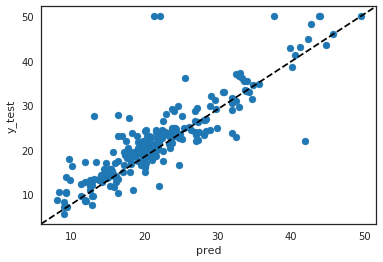

In [14]:
pred = rfr.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [15]:
mean_squared_error(y_test, pred)

18.290404743083002

In [16]:
# Random forests: using 6 features
rfr2 = RandomForestRegressor(max_features=6, random_state=1)
rfr2.fit(X_train, y_train)

/home/jbslanka/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [17]:
pred = rfr2.predict(X_test)
mean_squared_error(y_test, pred)

16.462186166007907

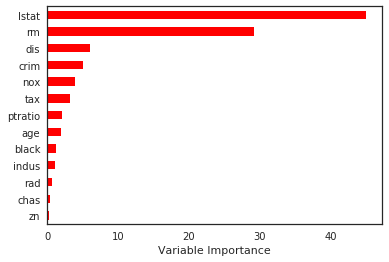

In [18]:
Importance = pd.DataFrame({'Importance':rfr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# now gradiant boosting

In [19]:
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

zn          0.010346
chas        0.121257
rad         0.150597
black       0.459114
indus       0.497222
nox         0.791744
age         0.880128
tax         1.108479
crim        2.684293
ptratio     4.452571
dis         5.987496
rm         27.934650
lstat      54.922104
dtype: float64


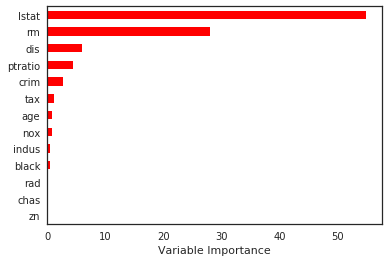

In [20]:
feature_importance = gbr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [21]:
mean_squared_error(y_test, gbr.predict(X_test))

15.585284273714013

In [44]:
def generateBoostingTrees(X,y, numTrees=1000, random_state=42, max_depth=6):
    trees = []
    rootDT = DecisionTreeRegressor(random_state=random_state,max_depth=max_depth)
    rootDT.fit(X,y)
    yHat = rootDT.predict(X)
    e = y - yHat
    trees.append(rootDT)

    for i in range(1,numTrees):
        dtX = DecisionTreeRegressor(random_state=random_state,max_depth=max_depth)
        dtX.fit(X,e)
        eNew = dtX.predict(X)
        yHat = eNew + yHat
        e = y - yHat
        mse = mean_squared_error(y,yHat)
        trees.append(dtX)
        print ("%3d: MSE: %2.8f" % (i,mse))
        if (mse < 0.0000001):
            break
        
    return trees

In [45]:
trees = generateBoostingTrees(X_train,y_train,400,10)

  1: MSE: 1.75456929
  2: MSE: 1.01525489
  3: MSE: 0.29086825
  4: MSE: 0.13306318
  5: MSE: 0.07767699
  6: MSE: 0.05144483
  7: MSE: 0.02823095
  8: MSE: 0.01552907
  9: MSE: 0.00849206
 10: MSE: 0.00243140
 11: MSE: 0.00117072
 12: MSE: 0.00085110
 13: MSE: 0.00017781
 14: MSE: 0.00009396
 15: MSE: 0.00004762
 16: MSE: 0.00002398
 17: MSE: 0.00001025
 18: MSE: 0.00000667
 19: MSE: 0.00000336
 20: MSE: 0.00000210
 21: MSE: 0.00000150
 22: MSE: 0.00000077
 23: MSE: 0.00000033
 24: MSE: 0.00000018
 25: MSE: 0.00000011
 26: MSE: 0.00000009


In [46]:
def computeRegression(dTrees, X):
    pred = dTrees[0].predict(X)
    for i in range(1,len(dTrees)):
        pred = pred + dTrees[i].predict(X) *.01
    return pred

In [47]:
print(len(trees))
predR = computeRegression(trees,X_test)
mean_squared_error(y_test,predR)

27


23.842027243617864

In [26]:
dtr3 = DecisionTreeRegressor()
dtr3.fit(X_train, y_train - dtr1.predict(X_train) - dtr2.predict(X_train) )

NameError: name 'dtr2' is not defined

In [ ]:
pred3 = dtr3.predict(X_test)
mean_squared_error(y_test, pred+pred2+pred3)

In [ ]:
dtr4 = DecisionTreeRegressor()
dtr4.fit(X_train, y_train - dtr1.predict(X_train) - dtr2.predict(X_train) - dtr3.predict(X_train) )

In [ ]:
pred4 = dtr4.predict(X_test)
mean_squared_error(y_test, pred+pred2+pred3+pred4)

In [ ]:
pred4


In [ ]:
pred3

In [ ]:
pred2